#### Copyright 2019 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Support Vector Machines

Support Vector Machines (SVM) are a powerful tool for performing both classification and regression tasks. In this Colab we'll create a classification model using a support vector machine Scikit Learn.

## Overview

### Learning Objectives

* Define problems for which support vector machines are a good fit.
* Understand the primary settings used to tune a support vector machine and their tradeoffs.

### Prerequisites

* Introduction to scikit-learn
* Classification
* Visualizations

### Estimated Duration

60 minutes

### Grading Criteria

Each exercise is worth 3 points. The rubric for calculating those points is:

| Points | Description |
|--------|-------------|
| 0      | No attempt at exercise |
| 1      | Attempted exercise, but code does not run |
| 2      | Attempted exercise, code runs, but produces incorrect answer |
| 3      | Exercise completed successfully |

There are 4 exercises in this Colab so there are 12 points available. The grading scale will be 9 points.

## SVM

Let's begin by loading a dataset that we'll use for classification.

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

iris_bunch = load_iris()

iris_df = pd.DataFrame(iris_bunch.data, columns=iris_bunch.feature_names)
iris_df['species'] = iris_bunch.target

iris_df.describe() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


You can see in the data description above that the ranges of values for each of the columns is quite a bit different. For instance the mean sepal length is almost twice as big as the sepal width.

SVM is sensitive to features with different scales. We'll run the data through the `StandardScalar` to get all of the feature data scaled.

First, let's create the scalar and fit it to our features.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df[iris_bunch.feature_names])

scaler.mean_

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

We can now transform the data, which applies the scaling.

In [4]:
iris_df[iris_bunch.feature_names] = scaler.transform(iris_df[iris_bunch.feature_names])

iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


That looks better now.

Since we scaled the data, the column names are now a bit deceiving. Let's rename the columns to get "(cm)" out of the names.

In [5]:
iris_df = iris_df.rename(index=str, columns={
  'sepal length (cm)': 'sepal_length',
  'sepal width (cm)': 'sepal_width',
  'petal length (cm)': 'petal_length',
  'petal width (cm)': 'petal_width'})
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


We could use all of the features to train our model, but in this case we are going to pick two features so that we can make some nice visulazations later on in the colab.

In [6]:
features = ['petal_length', 'petal_width']
target = 'species'

Now we can create and train a classifier. There are multiple ways to create an SVM model in ScikitLearn. In this case we are going to use the [linear support vector classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)

In [7]:
from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(iris_df[features], iris_df[target])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

We can now use our model to make predictions. In this case we are making predictions on the data that we just trained on in order to get and F1 score.

In [8]:
from sklearn.metrics import f1_score

predictions = classifier.predict(iris_df[features])

f1_score(iris_df[target], predictions, average='micro')

0.9533333333333334

We can visualize the decision boundaries using the pyplot `countourf` function.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Find the smallest value in the feature data. In this case we are looking
# across both features since we scaled them. Make the min value a little smaller
# than reality in order to get better see all of the points on the chart.
min_val = min(iris_df[features].min()) - 0.25

# Find the largets value in the feature data. Add a little extra to it to make
# the chart look better.
max_val = max(iris_df[features].max()) + 0.25

# Create a range of numbers from min to max with some small step. This will be
# used to make multple predictions that will create the decision boundary
# outline.
rng = np.arange(min_val, max_val, .02)

# Create a grid of points.
xx, yy = np.meshgrid(rng, rng)

# Make predictions on every point in the grid.
predictions = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predctions for plotting.
zz = predictions.reshape(xx.shape)

# Plot the predictions on the grid.
plt.contourf(xx, yy, zz)

# Plot each class of iris with a different marker.
#   Class 0 with circles
#   Class 1 with triangles
#   Class 2 with squares
for species_and_marker in ((0, 'o'), (1, '^'), (2, 's')):
  plt.scatter(
    iris_df[iris_df[target] == species_and_marker[0]][features[0]],
    iris_df[iris_df[target] == species_and_marker[0]][features[1]],
    marker=species_and_marker[1])
plt.show()

<Figure size 640x480 with 1 Axes>

# Exercises

## Exercise 1: Polynomial SVC

Scikit Learn also has an [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) classifier that can use non-linear kernels. Create an `SVC` classifier with a 3-degree polynomial kernel and train it on the iris data. Make predictions on the iris data that you trained on and then print out the F1 score.

### Student Solution

In [10]:
# Your code goes here
from sklearn.svm import SVC
from sklearn.metrics import f1_score

svc = SVC(kernel ='poly',degree=3)
svc.fit(iris_df[features], iris_df[target])
predict = svc.predict(iris_df[features])

f1_score(iris_df[target], predict,average='micro')

0.96

## Exercise 2: Plotting

Create a plot that shows the decision boundaries of the polynomial SVC that you created in exercise 1.

### Student Solution

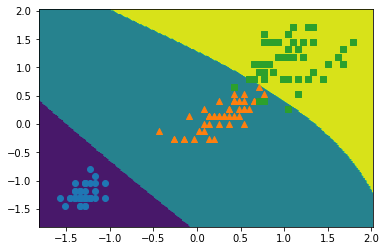

In [11]:
# Your code goes here
import matplotlib.pyplot as plt
import numpy as np

min_val = min(iris_df[features].min()) - 0.25

max_val = max(iris_df[features].max()) + 0.25

rng = np.arange(min_val, max_val, .02)

xx, yy = np.meshgrid(rng, rng)

predictions = svc.predict(np.c_[xx.ravel(), yy.ravel()])

zz = predictions.reshape(xx.shape)

plt.contourf(xx, yy, zz)

# Plot each class of iris with a different marker.
#   Class 0 with circles
#   Class 1 with triangles
#   Class 2 with squares
for species_and_marker in ((0, 'o'), (1, '^'), (2, 's')):
  plt.scatter(
    iris_df[iris_df[target] == species_and_marker[0]][features[0]],
    iris_df[iris_df[target] == species_and_marker[0]][features[1]],
    marker=species_and_marker[1])
plt.show()

## Exercise 3: C Hyperparameter

We accepted the default 1.0 C hyperparameter in the classifer above. Try halving and doubling the C value. How does it effect the F1 score?

Visualize the decision boundaries. Do they visibly change?

### Student Solution

Changing the C value affected F1 score and it visibly changed the decision boundaries. 

In [12]:
# Double the C value 
from sklearn.svm import SVC
from sklearn.metrics import f1_score

svc_double = SVC(C=2,degree=3,kernel ='poly')
svc_double.fit(iris_df[features], iris_df[target])
predictions = svc_double.predict(iris_df[features])
f1_score(iris_df[target], predictions,average='micro')

0.9666666666666667

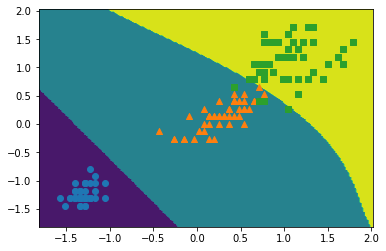

In [13]:
predictions = svc_double.predict(np.c_[xx.ravel(), yy.ravel()])

zz = predictions.reshape(xx.shape)

plt.contourf(xx, yy, zz)

for species_and_marker in ((0, 'o'), (1, '^'), (2, 's')):
  plt.scatter(
    iris_df[iris_df[target] == species_and_marker[0]][features[0]],
    iris_df[iris_df[target] == species_and_marker[0]][features[1]],
    marker=species_and_marker[1])
plt.show()

In [14]:
# Half of C value
from sklearn.svm import SVC
from sklearn.metrics import f1_score

svc_half = SVC(C=.5,degree=3,kernel ='poly')
svc_half.fit(iris_df[features], iris_df[target])
predictions = svc_half.predict(iris_df[features])
f1_score(iris_df[target], predictions,average='micro')

0.9466666666666667

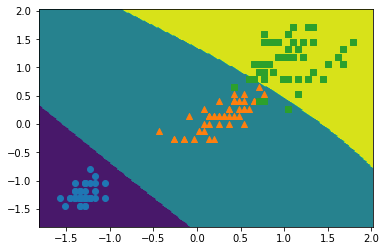

In [15]:
predictions = svc_half.predict(np.c_[xx.ravel(), yy.ravel()])

zz = predictions.reshape(xx.shape)

plt.contourf(xx, yy, zz)

for species_and_marker in ((0, 'o'), (1, '^'), (2, 's')):
  plt.scatter(
    iris_df[iris_df[target] == species_and_marker[0]][features[0]],
    iris_df[iris_df[target] == species_and_marker[0]][features[1]],
    marker=species_and_marker[1])
plt.show()

## Exercise 4: Regression

Use the [LinearSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVR.html) to predict Boston housing prices in the [Boston housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

### Student Solution

In [16]:
import pandas as pd
from sklearn.datasets import load_boston

boston_bunch = load_boston()

boston_df = pd.DataFrame(boston_bunch.data, columns=boston_bunch.feature_names)
boston_df['price'] = boston_bunch.target

boston_df.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [17]:
features = boston_bunch.feature_names
target = 'price'

In [18]:
from sklearn.svm import LinearSVR

regressor = LinearSVR()
regressor.fit(boston_df[features],boston_df[target])

/Users/dorishuang/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
import math 

predictions = regressor.predict(boston_df[features])

rmse = math.sqrt(mean_squared_error(boston_df[target], predictions))
rmse

5.643937218925934